In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

from sklearn.neighbors import KNeighborsClassifier
import os
from matplotlib.colors import ListedColormap
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv("NCAA_data.csv")
df.head().T

,0,1,2,3,4
player_id,kenyon-martin-1,aj-guyton-1,jake-voskuhl-1,khalid-el-amin-1,mike-smith-1
name,Kenyon Martin,A.J. Guyton,Jake Voskuhl,Khalid El-Amin,Mike Smith
class,Player,Player,Player,Bust,Bust
college,cincinnati,indiana,uconn,uconn,university of louisiana at monroe
assists,142,403,124,479,147
blocks,292,52,193,10,42
effective_field_goal_percentage,0.587,0.541,0.542,0.486,0.507
field_goal_percentage,0.586,0.455,0.542,0.416,0.428
free_throw_attempt_rate,0.494,0.249,0.555,0.257,0.357
free_throw_percentage,0.581,0.79,0.656,0.822,0.769


In [3]:
df.dtypes

player_id                           object
name                                object
class                               object
college                             object
assists                              int64
blocks                               int64
effective_field_goal_percentage    float64
field_goal_percentage              float64
free_throw_attempt_rate            float64
free_throw_percentage              float64
games_played                         int64
height                               int64
minutes_played                     float64
points                               int64
steals                               int64
three_point_percentage             float64
three_pointers                     float64
total_rebounds                       int64
true_shooting_percentage           float64
turnover_percentage                float64
turnovers                          float64
win_shares_per_40_minutes          float64
assists_per_40                     float64
blocks_per_

In [4]:
X_drop = df.drop(["name","college","player_id"],axis = 1)
X_drop.head()

,class,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,games_played,height,minutes_played,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,Player,142,292,0.587,0.586,0.494,0.581,116,81,2042.0,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,Player,403,52,0.541,0.455,0.249,0.790,128,73,3260.0,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,Player,124,193,0.542,0.542,0.555,0.656,138,83,2184.0,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,Bust,479,10,0.486,0.416,0.257,0.822,108,70,2149.0,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,Bust,147,42,0.507,0.428,0.357,0.769,55,80,1938.0,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [5]:
df["Player"]=  df["class"]== "Player"
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40,Player
0,kenyon-martin-1,Kenyon Martin,Player,cincinnati,142,292,0.587,0.586,0.494,0.581,...,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821,True
1,aj-guyton-1,A.J. Guyton,Player,indiana,403,52,0.541,0.455,0.249,0.790,...,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847,True
2,jake-voskuhl-1,Jake Voskuhl,Player,uconn,124,193,0.542,0.542,0.555,0.656,...,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403,True
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302,False
4,mike-smith-1,Mike Smith,Bust,university of louisiana at monroe,147,42,0.507,0.428,0.357,0.769,...,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200,False


In [6]:
df.corr

<bound method DataFrame.corr of                      player_id                     name   class  \
0              kenyon-martin-1            Kenyon Martin  Player   
1                  aj-guyton-1              A.J. Guyton  Player   
2               jake-voskuhl-1             Jake Voskuhl  Player   
3             khalid-el-amin-1           Khalid El-Amin    Bust   
4                 mike-smith-1               Mike Smith    Bust   
5                eddie-house-1              Eddie House  Player   
6             eduardo-najera-1           Eduardo Najera  Player   
7              lavor-postell-1            Lavor Postell  Player   
8              hanno-mottola-1            Hanno Mottola    Bust   
9            chris-carrawell-1          Chris Carrawell    Bust   
10              michael-redd-1             Michael Redd  Player   
11                dan-langhi-1               Dan Langhi  Player   
12              jabari-smith-1             Jabari Smith  Player   
13              mark-karcher-1

In [7]:
corrMatrix = df.corr()
print (corrMatrix)

                                  assists    blocks  \
assists                          1.000000 -0.272739   
blocks                          -0.272739  1.000000   
effective_field_goal_percentage -0.268490  0.232498   
field_goal_percentage           -0.442941  0.485455   
free_throw_attempt_rate         -0.237816  0.314064   
free_throw_percentage            0.356772 -0.344692   
games_played                     0.460016  0.338095   
height                          -0.657937  0.548010   
minutes_played                   0.609537  0.184179   
points                           0.522753  0.138989   
steals                           0.743892 -0.064415   
three_point_percentage           0.162077 -0.186147   
three_pointers                   0.565524 -0.360308   
total_rebounds                   0.045068  0.631964   
true_shooting_percentage        -0.161209  0.154584   
turnover_percentage              0.258674  0.033801   
turnovers                        0.711323  0.116806   
win_shares

In [8]:
corrMatrix.shape

(26, 26)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

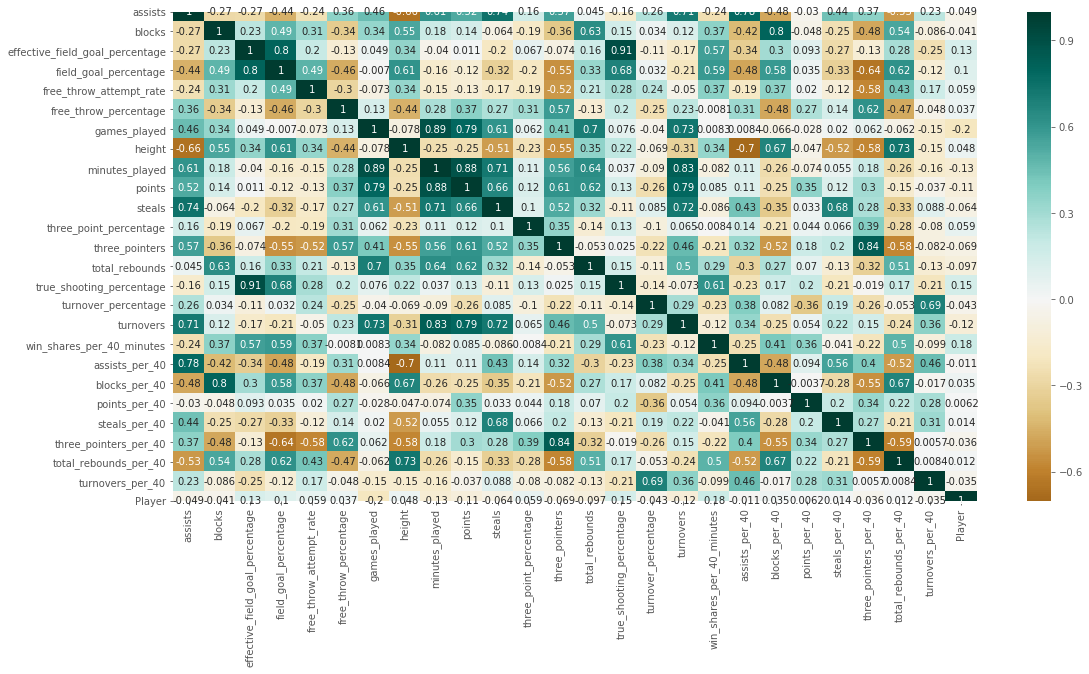

In [9]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

In [10]:
#X = df[["turnovers","points","height","total_rebounds_per_40","effective_field_goal_percentage","true_shooting_percentage"]]
#X = df[["turnovers","points","height","total_rebounds_per_40","effective_field_goal_percentage"]]
#X = df[["minutes_played", "turnovers","points","steals"]]
#X = df[["games_played", "turnovers","minutes_played","points","effective_field_goal_percentage"]]
X = df[["field_goal_percentage","win_shares_per_40_minutes","true_shooting_percentage","free_throw_attempt_rate","three_point_percentage","height"]]
X.head()

,field_goal_percentage,win_shares_per_40_minutes,true_shooting_percentage,free_throw_attempt_rate,three_point_percentage,height
0,0.586,0.346,0.592,0.494,0.222000,81
1,0.455,0.145,0.572,0.249,0.414000,73
2,0.542,0.237,0.573,0.555,0.329162,83
3,0.416,0.158,0.527,0.257,0.355000,70
4,0.428,0.165,0.551,0.357,0.318000,80


In [11]:
target = df["class"]
target_names = ["Players","Bust"]
# target

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target, random_state =42)

In [13]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

C:\Users\Pournima\.conda\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
print('Test Acc: %.6f' %model.score(X_test, y_test))

Test Acc: 0.658879


In [17]:
import pickle
filename = 'SVM.sav'
pickle.dump(model, open(filename, 'wb'))

In [19]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6588785046728972
